<center><img src="https://gitlab.com/accredian/insaid-data/-/raw/main/Logo-Accredian/Case-Study-Cropped.png" width= 30% /></center>

# <center><b>Linear Regression<b></center>

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Upgrading Libraries**](#Section32)
  - **3.3** [**Importing Libraries**](#Section33)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)
  - **4.2** [**Data Information**](#Section42)

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Pre-Profiling Report**](#Section51)<br>

**6.** [**Exploratory Data Analysis**](#Section6)<br>
**7.** [**Post Data Processing**](#Section7)<br>
  - **7.1** [**Feature Importance**](#Section71)<br>
  - **7.2** [**Data Splitting**](#Section72)<br>
  - **7.3** [**Feature Standardization**](#Section73)<br>

**8.** [**Model Development & Evaluation**](#Section8)<br>
  - **8.1** [**Simple Linear Regression**](#Section81)<br>
  - **8.2** [**Multiple Linear Regression**](#Section82)<br>

**9.** [**Conclusion**](#Section9)<br> bold text

---
<a name=Section1 id=Section1></a>
# **1. Introduction**
---

- Linear regression is a basic and commonly used type of **predictive analysis**. The overall idea of regression is to examine two things:

    - Does a set of predictor variables do a good job in **predicting** an **outcome** (dependent) variable?

    - Which variables in particular are **significant predictors** of the outcome variable, and in what way they do **impact** the **outcome** variable?

- These regression estimates are used to **explain** the **relationship** between one dependent variable and one or more independent variables.

- The simplest form of the regression equation with one dependent and one independent variable is defined by the formula:

<center>$\Large Y = β_0 + β_1*X$</center>

- where **$β_0$** is called the **intercept** and **$β_1$** is called the **coefficient** of X.

- Three major uses for regression analysis are:
    - Determining the strength of predictors
    - Forecasting an effect
    - Trend forecasting



---
<a name = Section2 id=Section2></a>
# **2. Problem Statement**
---

<center><img src="https://media4.giphy.com/media/v1.Y2lkPTc5MGI3NjExYmZiYWU3ZWJkNzNkMDNmOGVjNWRiYmFiM2EwZjlmNjg1YTNkY2JmNyZjdD1n/Q944waWqmYNYHA1rND/giphy.gif"></center>

- Consider yourself a data scientist, and you have been provided a dataset of **Fish Attributes**.

- Fish Attributes consist of **Weight,	Length1	,Length2,	Length3	,Height and	Width** for determining the Weight of the Fish.

- Perform **Weight prediction** of a fish with respect to different features and visualize their relationship.

---
<a name=Section3 id=Section3></a>
# **3. Installing & Importing Libraries**
---

<a name = Section31></a>
### **3.1 Installing Libraries**

In [7]:
!pip install -q datascience                                         # Package that is required by pandas profiling
!pip install -q pandas-profiling                                    # Library to generate basic statistics about data


In [8]:
%reset -f

<a name=Section32 id=Section32></a>
### **3.2 Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync.

- Make sure **not** to **execute** the **following cell again** after restarting the runtime.

- If you are using **local system** instead of server, then **remove "!"** before executing the following cell.

In [11]:
!pip install -q --upgrade datascience                               # Package that is required by pandas profiling
!pip install -q --upgrade pandas-profiling                          # Library to generate basic statistics about data
!pip install pydantic-settings

<a name=Section33 id=Section33></a>
### **3.3 Importing Libraries**

In [14]:
#------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
from scipy.stats import pearsonr                                    # Importing pearson test to check correlation
import statsmodels.api as sm                                        # Importing statsmodel api
#-------------------------------------------------------------------------------------------------------------------------------
import plotly.graph_objects as go                                   # Importing plotly graphical interface
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

IndentationError: unexpected indent (<ipython-input-14-cec943f88afd>, line 4)

---
<a name=Section4 id=Section4></a>
# **4. Data Acquisition & Description**
---

- The data is about Fish weights with respect to different physical attributes like Length	Height	Width

| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 159 | 7 | 6.02 kB|


| Id | Features | Description |
| :-- | :--| :--|
|01|**Length1** | vertical length in cm |
|02|**Length2** | diagonal length in cm |
|03|**Length3**|cross length in cm|
|04|**Height**|height in cm|
|05|**Width**|diagonal width in cm|
|06|**Species**|species name of fish|
|07|**Weight**|weight of fish in Gram g|

In [ ]:
data = pd.read_csv(filepath_or_buffer='https://gitlab.com/accredian/insaid-data/-/raw/main/Terms%202023/Term%204%20ML1/Module%202%20Linear%20Reg/Fish_1_.csv')
print('Data Shape:', data.shape)
data.head()

Data Shape: (159, 7)


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


<a name=Section41 id=Section41></a>
### **4.1 Data Description**

- In this section we will get **information about the data** and see some observations.

In [ ]:
data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.00000,159.00000,159.00000,159.00000,159.00000,159.00000
mean,398.32642,26.24717,28.41572,31.22704,8.97099,4.41749
std,357.97832,9.99644,10.71633,11.61025,4.28621,1.68580
min,0.00000,7.50000,8.40000,8.80000,1.72840,1.04760
25%,120.00000,19.05000,21.00000,23.15000,5.94480,3.38565
50%,273.00000,25.20000,27.30000,29.40000,7.78600,4.24850
75%,650.00000,32.70000,35.50000,39.65000,12.36590,5.58450
max,1650.00000,59.00000,63.40000,68.00000,18.95700,8.14200


**Observation:**

- The **average** value of **Weight** is **273** grams.

- The **maximum** value of **Weight** is **1650** grams.

- The **maximum** value o **Length1**. **Length2** and **Height** is found to be **59**, **63** and **18** cm, respectively.

<a name=Section42 id=Section42></a>
### **4.2 Data Information**

- In this section we will see the **information about the types of features**.

In [ ]:
data.info(verbose=True, memory_usage='deep', null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 17.2 KB


**Observation:**

- There are **no null values present** in this data set.

- **Each feature** has **correct data type**.

<a name=Section5 id=Section5></a>

---
# **5. Data Pre-Processing**
---

<a name=Section51 id=Section51></a>
### **5.1 Data Pre-Profiling**

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

In [ ]:
profile = ProfileReport(df=data)
profile.to_file(output_file='Pre Profiling Report.html')
print('Pre-Profiling Report Ready to Download!')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Pre-Profiling Report Ready to Download!


**Observations:**

- Report shows that there a **total** of **7 features** and 6 are **numerical** with 1 being **categorical**.

- There are **neither null values nor inconsistency** in data types.

- We can observe that **Width** and **Length1** is highly correlated with **sales**.

- For full details checkout the report.

<a name=Section6 id=Section6></a>

---
# **6. Exploratory Data Analysis**
---

In [ ]:
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.00000,23.20000,25.40000,30.00000,11.52000,4.02000
1,Bream,290.00000,24.00000,26.30000,31.20000,12.48000,4.30560
2,Bream,340.00000,23.90000,26.50000,31.10000,12.37780,4.69610
3,Bream,363.00000,26.30000,29.00000,33.50000,12.73000,4.45550
4,Bream,430.00000,26.50000,29.00000,34.00000,12.44400,5.13400


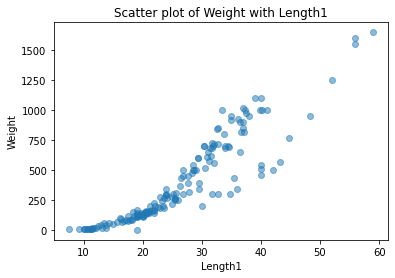

In [ ]:
plt.scatter(data['Length1'], data['Weight'], alpha=0.5)
plt.title('Scatter plot of Weight with Length1')
plt.xlabel('Length1')
plt.ylabel('Weight')
plt.show()

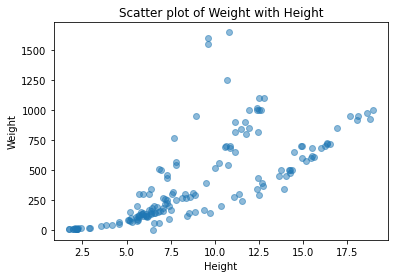

In [ ]:
plt.scatter(data['Height'], data['Weight'], alpha=0.5)
plt.title('Scatter plot of Weight with Height')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

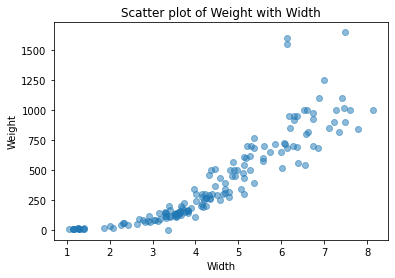

In [ ]:
plt.scatter(data['Width'], data['Weight'], alpha=0.5)
plt.title('Scatter plot of Weight with Width')
plt.xlabel('Width')
plt.ylabel('Weight')
plt.show()

**Obsevation:**

- **Length** and **Height** **Width** are linearly related to dependent variable **Weight**

**<h4>Question:** What is the frequency distribution of	Length1,	Length2,Length3,	Height,	Width,

---

and Weight</h4>

In [ ]:
# Initiating a plotly figure
fig = go.Figure()

# Adding first graph of TV histogram
fig.add_histogram(x=data['Length1'],
                  marker=dict(color='rgba(69, 214, 179, 1.0)',
                              line=dict(color='rgba(66, 5, 84, 1.0)',
                                        width=3)))

# Adding a button to select different features
button = [dict(method='update',
               args = [{'x': [data[k]],
                        'visible': [True]}],
               label=k) for k in data.describe().columns]

# Updating the layout of the graph
fig.update_layout(title_text='Frequency distribution of Features',
                  title_x=0.5,
                  width=1000,
                  height=500,
                  xaxis_title='Feature X',
                  yaxis_title='Frequency',
                  updatemenus=[dict(active=0,
                                    buttons=button,
                                    x=1.2,
                                    y=1,
                                    xanchor='left',
                                    yanchor='top')])

# Adding extra annotaions alongside the button
fig.add_annotation(x=1.2,
                   y=1.08,
                   xref='paper',
                   yref='paper',
                   showarrow=False,
                   xanchor='left',
                   yanchor = 'top',
                   text='Feature')

# Display the graph
fig.show()

**Obsevation:**

- **Width** and **Height** feature shows **symmetric distribution** while **Weight** feature shows **asymmetric distribution** (**positive**).

- The **Length1** feature is **almost normally distrbuted**.

- **Points to be Noted:**

    - If you want to dig deeper into this, feel free to do so...

    - Our objective here is to show the functionality of Linear Regression as opposed to perform EDA in-depth.

<AxesSubplot:>

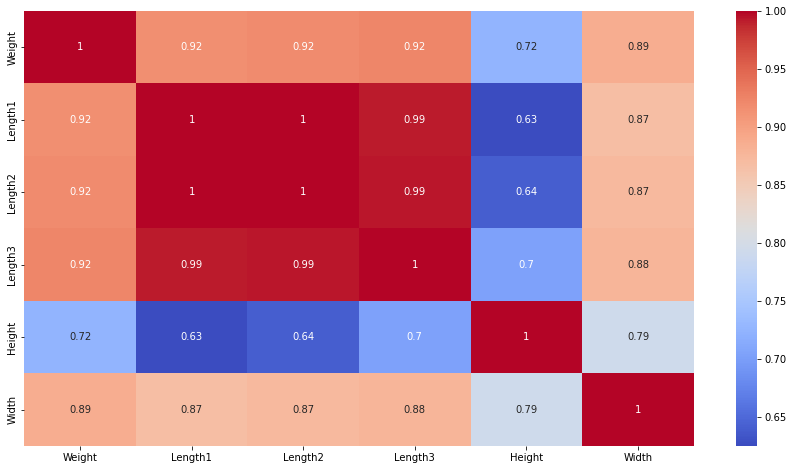

In [ ]:
## Correlation Heatmap
plt.figure(figsize=(15,8))
correlation = data.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

**Obsevation:**
- **Length1** and **Length** feature shows **high multicollinearity** while **Height** and **Width** feature shows **little multicollinearity**.

<a name=Section7 id=Section7></a>

---
# **7. Post Data Processing**
---



<a name=Section71 id=Section71></a>
### **7.1 Feature Importance**

- In real world, there may be many features and using all of them in model development is not a good idea.

- Instead, we choose **subset of features** which are **essentail** for model building because not all features give good results.

- In this sub-part, we will show one such way (**Pearson Correlation Coefficient Test**) by which you can choose essential features.

- Here's how it works:
    - **H0:** Feature X and Feature y is not correlated.
    - **HA:** Feature X and Feature y is correlated.

**<center>(You can set threshold based on your experience in the domain)</center>**

- If **coef. > 0.75** and **p-value <= 0.05**: Feature X and Feature y is **strongly correlated**.
- If **coef. > 0.65** and **p-value <= 0.05**: Feature X and Feature y is **moderately correlated**.
- If **coef. close to 0** and **p-value <= 0.05**: Feature X and Feature y is **not correlated**.



In [ ]:
# Split the data for correlation
X1 = data.drop(labels=['Weight', 'Species'], axis=1)
y1 = data['Weight']

# Perform Pearson Correlation Coefficient Test
for feature in X1.columns:
    coef, p_value = np.round(a=pearsonr(data[feature], y1), decimals=4)
    print('[' + feature +  ', ' + y1.name + '] -->', 'Correlation Coefficient:', coef, 'p-value:', p_value)

[Length1, Weight] --> Correlation Coefficient: 0.9157 p-value: 0.0
[Length2, Weight] --> Correlation Coefficient: 0.9186 p-value: 0.0
[Length3, Weight] --> Correlation Coefficient: 0.923 p-value: 0.0
[Height, Weight] --> Correlation Coefficient: 0.7243 p-value: 0.0
[Width, Weight] --> Correlation Coefficient: 0.8865 p-value: 0.0


**Observation:**

- We can observe that **Length1** and **Weight** is **highly correlated**. So, developing model with this feature will benifit us.

- **Height** and **Weight** is **moderately correlated**. So, we may or may not like to add this feature to our model development.

- In our upcoming section, we will only use All features.


### **7.2 Categorical Feature Encoding**

- Categorical feature encoding is the process of **converting** a categorical feature (e.g., a column in a dataset) into a numerical representation so that it can be used for machine learning algorithms.

- This is done by **assigning numerical values** to each of the categories in the feature.

In [ ]:
#encoding the categorical variables into numerical
data = pd.get_dummies(data, prefix=None, dummy_na=False, columns= ['Species'], sparse=False, drop_first=False, dtype=None)

In [ ]:
# Split the data as Inputs and Target
X = data.drop(labels=['Weight'], axis=1)
y = data['Weight']

<a name=Section72 id=Section72></a>
### **7.2 Data Splitting**

- Before standardizing our data, let's spit them into training and testing sets.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (127, 12) (127,)
Testing Data Shape: (32, 12) (32,)


<a name=Section73 id=Section73></a>
### **7.3 Feature Standardization**

- Variables that are measured at different scales do not contribute equally to the model fitting and might end up creating a **bias**.

- To deal with this potential problem **feature-wise standardization** (`μ=0`, `σ=1`) is usually used **prior** to **model fitting**.

In [ ]:
data.head()

,Weight,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.00000,23.20000,25.40000,30.00000,11.52000,4.02000,1,0,0,0,0,0,0
1,290.00000,24.00000,26.30000,31.20000,12.48000,4.30560,1,0,0,0,0,0,0
2,340.00000,23.90000,26.50000,31.10000,12.37780,4.69610,1,0,0,0,0,0,0
3,363.00000,26.30000,29.00000,33.50000,12.73000,4.45550,1,0,0,0,0,0,0
4,430.00000,26.50000,29.00000,34.00000,12.44400,5.13400,1,0,0,0,0,0,0


In [ ]:
# Standardizing training set and testing set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Overriding X_train and X_test variable with new values (scaled)
X_train = pd.DataFrame(data=X_train_scaled, columns=['Length1',	'Length2',	'Length3',	'Height',	'Width','Species_Bream',	'Species_Parkki','Species_Perch','Species_Pike','Species_Roach','Species_Smelt','Species_Whitefish'])
X_test = pd.DataFrame(data=X_test_scaled, columns=['Length1',	'Length2',	'Length3',	'Height',	'Width','Species_Bream',	'Species_Parkki','Species_Perch','Species_Pike','Species_Roach','Species_Smelt','Species_Whitefish'])

print('Feature Standardization Success!')

Feature Standardization Success!


<a name = Section8 id=Section8></a>

---
# **8. Model Development & Evaluation**
---

- In this section we will develop Linear Regression models: **Simple Linear Regression** and **Multiple Linear Regression**.

- Then we will **analyze the results** obtained using **R^Squared** and **make our observations**.

<a name=Section81 id=Section81></a>

## **8.1 Simple Linear Regression (SLR)**

<a name=Section811 id=Section811></a>

### **8.1.1 Length1 vs Weight**

#### **8.1.1.1 First Method**

In [ ]:
# Defining the variables
x = X_train[['Length1']].values.tolist()
y = y_train.tolist()

# Adding the constant term
x = sm.add_constant(x)

# Fit the model and print the summary
result = sm.OLS(y, x).fit()

# Predict the results
y_train_predict = result.predict(sm.add_constant(X_train[['Length1']].values.tolist()))
y_test_predict = result.predict(sm.add_constant(X_test[['Length1']].values.tolist()))

# Print the train summary
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     677.2
Date:                Thu, 16 Mar 2023   Prob (F-statistic):           2.69e-52
Time:                        11:17:04   Log-Likelihood:                -806.34
No. Observations:                 127   AIC:                             1617.
Df Residuals:                     125   BIC:                             1622.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        386.7945     12.379     31.245      0.0

In [ ]:
# Render the visual using plotly
fig = go.Figure()
fig.add_trace(trace=go.Scatter(x=X_train['Length1'], y=y_train, name='train', mode='markers'))
fig.add_trace(trace=go.Scatter(x=X_test['Length1'], y=y_test, name='test', mode='markers'))
fig.add_trace(trace=go.Scatter(x=X_train['Length1'], y=y_train_predict, name='train_prediction'))

# Update figure layout
fig.update_layout(title_text='Regression fit of Length1 w.r.t. Weight (in gm)',
                  title_x=0.5,
                  showlegend=True,
                  xaxis_title="Length1",
                  yaxis_title="Weight (in gm)",)

# Get the intercept and coefficient values
print('Coefficient & Intercept:', result.params)
print('R^Squared Value [Train]:', r2_score(y_train, y_train_predict))
print('R^Squared Value [Test]:', r2_score(y_test, y_test_predict))
print('RMSE [Train]:', np.mean(mean_squared_error(y_train, y_train_predict)))
print('RMSE [Test]:', np.mean(mean_squared_error(y_test, y_test_predict)))

# Display the figure
fig.show()

Coefficient & Intercept: [386.79448819 322.13718809]
R^Squared Value [Train]: 0.844170424366534
R^Squared Value [Test]: 0.8116084146869397
RMSE [Train]: 19155.85241259347
RMSE [Test]: 26796.684740821373


#### **8.1.1.1 Second Method**

In [ ]:
# Develop the model by fitting input and target
model = LinearRegression()
model.fit(X_train[['Length1']], y_train)

# Predict the results
y_train_predict = model.predict(X_train[['Length1']])
y_test_predict = model.predict(X_test[['Length1']])

# Render the visual using plotly
fig = go.Figure()
fig.add_trace(trace=go.Scatter(x=X_train['Length1'], y=y_train, name='train', mode='markers'))
fig.add_trace(trace=go.Scatter(x=X_test['Length1'], y=y_test, name='test', mode='markers'))
fig.add_trace(trace=go.Scatter(x=X_train['Length1'], y=y_train_predict, name='train_prediction'))

# Update figure layout
fig.update_layout(title_text='Regression fit of Length1 w.r.t. Weight (in gm)',
                  title_x=0.5,
                  showlegend=True,
                  xaxis_title="Length1",
                  yaxis_title="Weight (in gm)",)

# Get the intercept and coefficient values
print('Coefficient & Intercept:', model.coef_, model.intercept_)
print('R^Squared Value [Train]:', model.score(X_train[['Length1']], y_train))
print('R^Squared Value [Test]:', model.score(X_test[['Length1']], y_test))
print('RMSE [Train]:', np.mean(mean_squared_error(y_train, y_train_predict)))
print('RMSE [Test]:', np.mean(mean_squared_error(y_test, y_test_predict)))

# Display the figure
fig.show()

Coefficient & Intercept: [322.13718809] 386.7944881889764
R^Squared Value [Train]: 0.844170424366534
R^Squared Value [Test]: 0.8116084146869397
RMSE [Train]: 19155.85241259347
RMSE [Test]: 26796.68474082138


<a name=Section812 id=Section812></a>

### **8.1.2 Height vs Weight**

In [ ]:
# Develop the model by fitting input and target
model = LinearRegression()
model.fit(X_train[['Height']], y_train)

# Predict the results
y_train_predict = model.predict(X_train[['Height']])
y_test_predict = model.predict(X_test[['Height']])

# Render the visual using plotly
fig = go.Figure()
fig.add_trace(trace=go.Scatter(x=X_train['Height'], y=y_train, name='train', mode='markers'))
fig.add_trace(trace=go.Scatter(x=X_test['Height'], y=y_test, name='test', mode='markers'))
fig.add_trace(trace=go.Scatter(x=X_train['Height'], y=y_train_predict, name='train_prediction'))

# Update figure layout
fig.update_layout(title_text='Regression fit of Height w.r.t. Weight (in gm)',
                  title_x=0.5,
                  showlegend=True,
                  xaxis_title="Height",
                  yaxis_title="Weight (in gm)",)

# Get the intercept and coefficient values
print('Coefficient & Intercept:', model.coef_, model.intercept_)
print('R^Squared Value [Train]:', model.score(X_train[['Height']], y_train))
print('R^Squared Value [Test]:', model.score(X_test[['Height']], y_test))
print('RMSE [Train]:', np.mean(mean_squared_error(y_train, y_train_predict)))
print('RMSE [Test]:', np.mean(mean_squared_error(y_test, y_test_predict)))

# Display the figure
fig.show()

Coefficient & Intercept: [242.28294386] 386.7944881889764
R^Squared Value [Train]: 0.4775227747509174
R^Squared Value [Test]: 0.6773258019470221
RMSE [Train]: 64227.19548023559
RMSE [Test]: 45896.94781141363


<a name=Section813 id=Section813></a>

### **8.1.3 Width vs Weight**

In [ ]:
# Develop the model by fitting input and target
model = LinearRegression()
model.fit(X_train[['Width']], y_train)

# Predict the results
y_train_predict = model.predict(X_train[['Width']])
y_test_predict = model.predict(X_test[['Width']])

# Render the visual using plotly
fig = go.Figure()
fig.add_trace(trace=go.Scatter(x=X_train['Width'], y=y_train, name='train', mode='markers'))
fig.add_trace(trace=go.Scatter(x=X_test['Width'], y=y_test, name='test', mode='markers'))
fig.add_trace(trace=go.Scatter(x=X_train['Width'], y=y_train_predict, name='train_prediction'))

# Update figure layout
fig.update_layout(title_text='Regression fit of Species_Bream w.r.t. Weight (in gm)',
                  title_x=0.5,
                  showlegend=True,
                  xaxis_title="Width",
                  yaxis_title="Weight (in gm)",)

# Get the intercept and coefficient values
print('Coefficient & Intercept:', model.coef_, model.intercept_)
print('R^Squared Value [Train]:', model.score(X_train[['Width']], y_train))
print('R^Squared Value [Test]:', model.score(X_test[['Width']], y_test))
print('RMSE [Train]:', np.mean(mean_squared_error(y_train, y_train_predict)))
print('RMSE [Test]:', np.mean(mean_squared_error(y_test, y_test_predict)))

# Display the figure
fig.show()

Coefficient & Intercept: [307.62831508] 386.7944881889764
R^Squared Value [Train]: 0.7698409686614901
R^Squared Value [Test]: 0.8302645147046017
RMSE [Train]: 28293.040122988783
RMSE [Test]: 24143.054379169203


<a name=Section82 id=Section82></a>

## **8.2 Multiple Linear Regression (MLR)**

- In muliple linear regression, we utilize the power of multiple features in place of single feature.

In [ ]:
# Develop the model by fitting input and target
model = LinearRegression()
model.fit(X_train, y_train)

train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Get the intercept and coefficient values
print('Coefficient & Intercept:', model.coef_, model.intercept_)
print('R^Squared Value [Train]:', model.score(X_train, y_train))
print('R^Squared Value [Test]:', model.score(X_test, y_test))
print('RMSE [Train]:', np.mean(mean_squared_error(y_train, train_predictions)))
print('RMSE [Test]:', np.mean(mean_squared_error(y_test, test_predictions)))


Coefficient & Intercept: [-587.21436662  590.24737652  446.20523387  -42.74052553   11.76511745
  -11.42456495   29.85013377   22.18018638 -112.78004415    2.23368436
   77.48172837    2.87168662] 386.79448818897646
R^Squared Value [Train]: 0.928595689771155
R^Squared Value [Test]: 0.9507352480054505
RMSE [Train]: 8777.60478270237
RMSE [Test]: 7007.383189854041


- We can observe that our model accuracy has increased while RMSE has decreased when we used multiple features.

<a name=Section9 id=Section9></a>

---
# **9. Conclusion**
---

- We **studied in breifly about the data**, its **characteristics** and its **distribution**.

- We **investigated about the features** which to **retain** and which to **discard**.

- We **scaled** our **input train set** and **test set** and moved to the model development part.

- We **learned** **two different implementations** of Linear Regression i.e. **statistical** and **direct form**.

- We then moved to **multiple linear regression** aiming for high accuracy and low error.

- We finalized to go with **Multiple Linear Regression** because it gave the **best accuracy** with the **lowest error**.